# Machine Learning
## ประเภทของ Ml (แบ่งตามลักษณะ การสอนของModel)คือ
    1. supervised - แบบมีผู้สอนโดยกำหนดข้อมูล และบอกModel ว่าให้ทำอะไร และให้ตัวอย่างการทำงานไป
    2. unsupervised - ไม่มีผู้สอน ให้ข้อมูลและ โมเดลจะวิเคราะห์เอง ว่าต้องทำอะไร 
    3. rienforcement - มีการสอนในเบื่องต้น และเรียนรู้จากการลองผิดลองถูกของ Model โดยเป็นการให้คะแนนและหักคะแนน
## ประเภทของ Model คือ
    1. classifation - แบ่งกลุ่มของข้อมูลเช่น กลุ่มของผู้ป่ายกับคนธรรมดา (supervised)
    2. regression - การทำนายค่าต่างๆ (supervised)
    3. rienforcement

## Regression

![ขั้นตอนการ Modeling](https://sv1.picz.in.th/images/2019/01/17/9m0dFu.md.png "ขั้นตอนการ Modeling")





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('clear-data.csv')


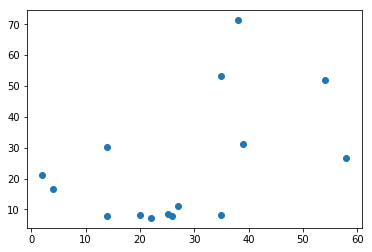

In [5]:
df = df[['Age','Fare']][:15]
plt.scatter(df['Age'],df['Fare'])

In [6]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
X = df[['Age']]
y = df[['Fare']]

In [9]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
y_pred = model.predict(X)
y_pred

array([[20.76766645],
       [30.22102937],
       [23.13100718],
       [28.44852382],
       [28.44852382],
       [22.62325508],
       [39.67439228],
       [ 8.95096281],
       [23.72184236],
       [16.040985  ],
       [10.13263318],
       [42.03773301],
       [19.58599609],
       [30.81186455],
       [16.040985  ]])

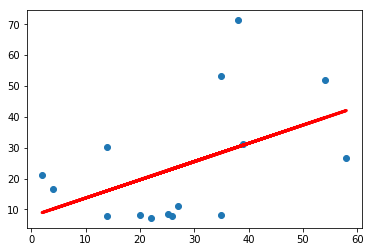

In [11]:
plt.scatter(X,y)
plt.plot(X,y_pred,color = 'red', linewidth=3) 